# Lending club case study

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Import, Inspection and Cleaning

In [111]:
# Reading the data from the given dataset file
data = pd.read_csv('loan.csv')
data.head()

/var/folders/dm/0_v190gd48l8cd_pl34qq10m0000gp/T/ipykernel_93347/1479458747.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [112]:
# Identify the no of rows and columns
data.shape

(39717, 111)

In [113]:
# Identify columns with NULL values and count them. 
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [114]:
# Drop all columns with all null as they wont add much value to the analysis. 
data =data.dropna(axis=1, how='all')

In [115]:
# Get the shape of the data after dropping the NULL Columns. 
data.shape

(39717, 57)

In [116]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [117]:
# Dropping columns which have 0 or blanks in all records or same value for all records since they wont be of much significance for our analysis
data=data.drop(['pymnt_plan','url','initial_list_status','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','out_prncp','out_prncp_inv','next_pymnt_d'],axis=1)

In [118]:
# Dropping columns having same value. 
data=data.drop(['application_type','policy_code'],axis=1)

In [119]:
# Dropping columns since values in 25th percentile and 75th percentile are 0 and hence wont add much value for analysis

data=data.drop(['total_rec_late_fee','recoveries','collection_recovery_fee','pub_rec_bankruptcies'],axis=1)

In [120]:
data.mths_since_last_record.describe()

count    2786.000000
mean       69.698134
std        43.822529
min         0.000000
25%        22.000000
50%        90.000000
75%       104.000000
max       129.000000
Name: mths_since_last_record, dtype: float64

In [121]:
data.mths_since_last_delinq.describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [122]:
data.pub_rec.describe()

count    39717.000000
mean         0.055065
std          0.237200
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [123]:
# Dropping columns since values in 25th percentile and 75th percentile are 0 and hence wont add much value for analysis

data=data.drop(['pub_rec'],axis=1)

In [124]:
data.shape

(39717, 39)

In [125]:
def replaceString(text, char_to_replace):
    return text.replace(char_to_replace, '')

In [126]:
# Cleaning the data in revol_util to remove the % symbol and convert it to float
#data.revol_util=data['revol_util'].apply(lambda x:str(x).replace('%',''))
data.revol_util=data['revol_util'].apply(lambda x: replaceString(str(x),'%'))
data.revol_util=data.revol_util.astype('float')

In [127]:
# debt to income ratio <2 seems to be not right. As a person having an active loan and revolving balance cannot have less than 2 dti based on their income. 

data=data[~((data.loan_status=='Charged Off') & (data.dti<2))]
data=data[~((data.revol_bal==0) & (data.revol_util>0))]

In [128]:
# Cleaning the int_rate column to remove % symbol and convert to float.
data.int_rate=data.int_rate.apply(lambda x:replaceString(str(x),'%'))
data.int_rate=data.int_rate.astype('float')

In [129]:
# We may as well remove records with loan status as Current, as then wont give much insights into defaulters vs paid off

data=data[~(data['loan_status']=='Current')]

{'whiskers': [<matplotlib.lines.Line2D at 0x1500151d0>,
 'caps': [<matplotlib.lines.Line2D at 0x29943a890>,
 'boxes': [<matplotlib.lines.Line2D at 0x150017ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x150208250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1500248d0>],
 'means': []}

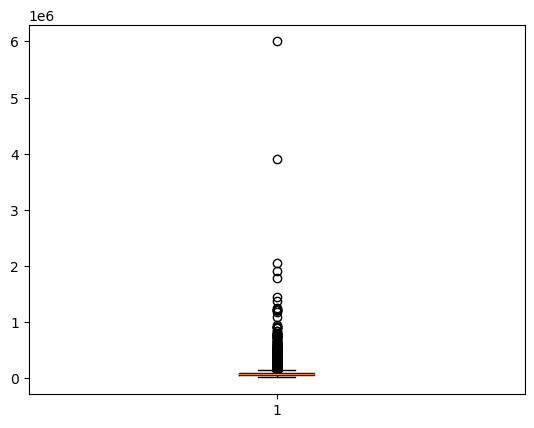

In [130]:
# Identifying probable outliers in annual inc
plt.boxplot(data.annual_inc)

In [131]:
# Removing records with annual_income range greater than 2 million which are outliers compared to other salaries

data=data[~(data['annual_inc']>200000)]

In [132]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37708 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      37708 non-null  int64  
 1   member_id               37708 non-null  int64  
 2   loan_amnt               37708 non-null  int64  
 3   funded_amnt             37708 non-null  int64  
 4   funded_amnt_inv         37708 non-null  float64
 5   term                    37708 non-null  object 
 6   int_rate                37708 non-null  float64
 7   installment             37708 non-null  float64
 8   grade                   37708 non-null  object 
 9   sub_grade               37708 non-null  object 
 10  emp_title               35411 non-null  object 
 11  emp_length              36694 non-null  object 
 12  home_ownership          37708 non-null  object 
 13  annual_inc              37708 non-null  float64
 14  verification_status     37708 non-null

In [133]:
data.emp_title.value_counts()

US Army                                 131
Bank of America                         106
IBM                                      60
AT&T                                     57
Kaiser Permanente                        55
                                       ... 
Macy's East Inc.                          1
New Mexico Department of Corrections      1
Sapa                                      1
state of wyoming                          1
Evergreen Center                          1
Name: emp_title, Length: 27491, dtype: int64

In [134]:
# Cleaning the term variable to remove months string from it and convert to int
data.term=data.term.apply(lambda x: replaceString(x, ' months'))
data.term=data.term.astype('int32')

In [135]:
# Derive a new field to get the total_due amount for each customer. 
data['total_due']=data['installment'] * data['term']

In [136]:
# Method to format a date variable
import datetime
def formatDate(x):
    return datetime.datetime.strptime(x,'%b-%y').strftime('%Y-%m-%d')

In [137]:
# Conversion on date variables to convert from MMM-yy format to yyyy-mm-dd format
data['updated_issue_dt']=data.issue_d.apply(lambda x: formatDate(x))
data['upd_earliest_cr_line']=data.earliest_cr_line.apply(lambda x: formatDate(x))

In [138]:
## Place the annual income in to buckets and plot a Heat map
data['income_bucket']=pd.qcut(data.annual_inc,[0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,total_due,updated_issue_dt,upd_earliest_cr_line,income_bucket
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,Jan-15,171.62,May-16,5863.32,2011-12-01,1985-01-01,VL
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,Jun-14,649.91,May-16,3035.88,2011-12-01,2001-11-01,VL
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16,12215.16,2011-12-01,1996-02-01,L
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,5632.21,5000.00,632.21,Jan-15,161.03,Jan-16,5632.56,2011-12-01,2004-11-01,VL
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,...,10110.84,6985.61,3125.23,May-16,1313.76,May-16,10204.80,2011-12-01,2005-07-01,L


In [139]:
# Creating bucket for interest rate to identify the defaulters pattern.
data['interest_bucket'] = pd.qcut(data.int_rate,[0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,total_due,updated_issue_dt,upd_earliest_cr_line,income_bucket,interest_bucket
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5000.00,863.16,Jan-15,171.62,May-16,5863.32,2011-12-01,1985-01-01,VL,L
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,2400.00,605.67,Jun-14,649.91,May-16,3035.88,2011-12-01,2001-11-01,VL,VH
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,10000.00,2214.92,Jan-15,357.48,Apr-16,12215.16,2011-12-01,1996-02-01,L,H
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,5000.00,632.21,Jan-15,161.03,Jan-16,5632.56,2011-12-01,2004-11-01,VL,VL
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,...,6985.61,3125.23,May-16,1313.76,May-16,10204.80,2011-12-01,2005-07-01,L,VH


In [140]:
# Deriving monthly income.
data['monthly_in']=data['annual_inc']/12

In [141]:
# Derive no of years of credit variable for each applicant. 
data['no_years_of_credit']=pd.to_datetime(data.updated_issue_dt).dt.year-pd.to_datetime(data.upd_earliest_cr_line).dt.year
data.no_years_of_credit=data.no_years_of_credit.apply(lambda x:x if x>0 else 0)

In [142]:
data['issued_month']=pd.to_datetime(data.updated_issue_dt).dt.month

In [143]:
data['issued_quarter']=pd.to_datetime(data.updated_issue_dt).dt.quarter
data.shape

(37708, 48)

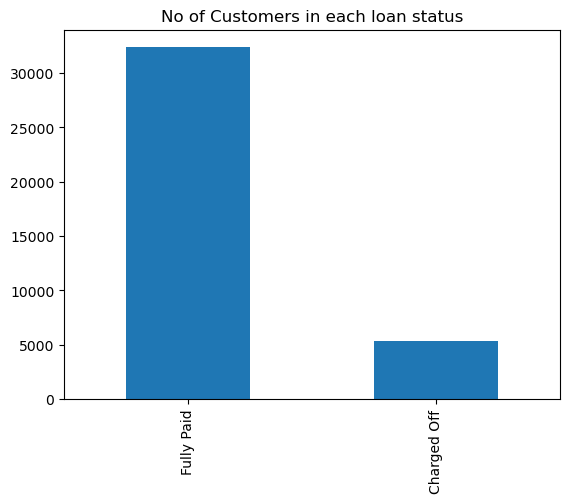

In [144]:
data.loan_status.value_counts().plot.bar()
plt.title("No of Customers in each loan status")
plt.show()

In [145]:
data.addr_state.value_counts()

CA    6772
NY    3590
FL    2708
TX    2594
NJ    1733
PA    1448
IL    1444
VA    1344
GA    1335
MA    1265
OH    1163
MD     993
AZ     830
WA     802
CO     749
NC     738
CT     699
MI     692
MO     663
MN     598
NV     470
SC     449
OR     433
WI     432
AL     429
LA     418
KY     309
OK     286
KS     249
UT     243
AR     230
DC     208
RI     189
NM     174
WV     170
HI     165
NH     163
DE     113
MT      83
WY      80
AK      77
SD      62
VT      53
MS      18
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [146]:
# Creating a new data frame of defaulters to do more analysis on defaulters.

data_defaulters=data[data['loan_status']=='Charged Off']

In [147]:
# Creating a new data frame of fully paid customers to do more analysis.

data_fullypaid=data[data['loan_status']=='Fully Paid']

# Univariate Analysis

In [148]:
data_defaulters.loan_amnt.describe()

count     5333.000000
mean     12079.097131
std       8005.832829
min        900.000000
25%       5850.000000
50%      10000.000000
75%      16300.000000
max      35000.000000
Name: loan_amnt, dtype: float64

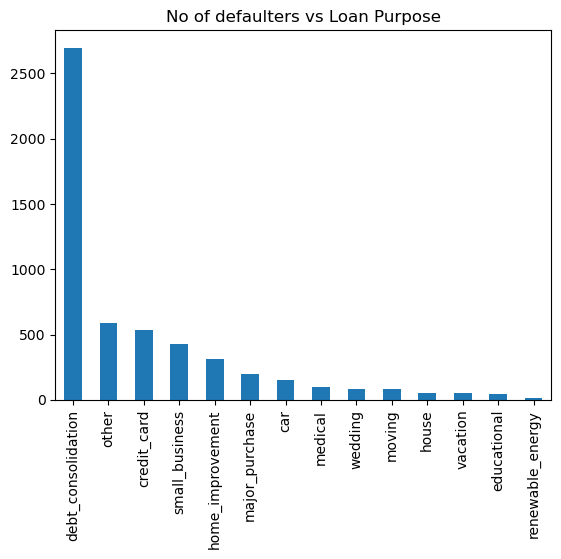

In [149]:
# no of defaulters against purpose of loan
data_defaulters.purpose.value_counts().plot.bar()
plt.title("No of defaulters vs Loan Purpose")
plt.show()

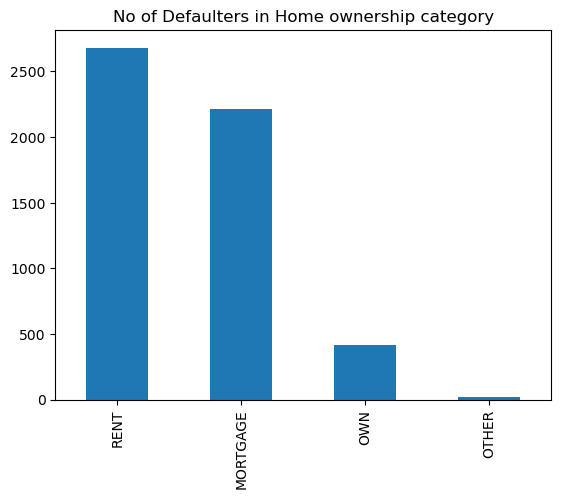

In [150]:
data_defaulters.home_ownership.value_counts().plot.bar()
plt.title('No of Defaulters in Home ownership category')
plt.show()

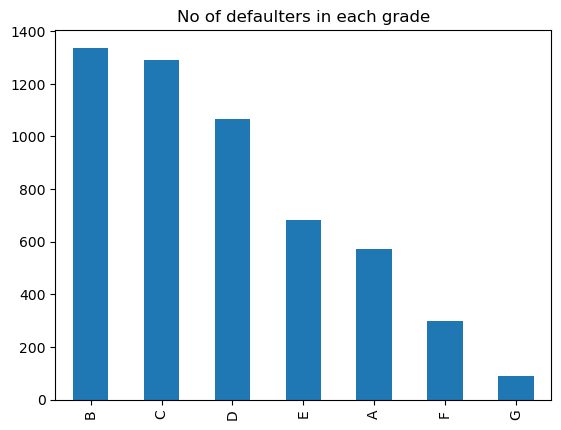

In [151]:
data_defaulters.grade.value_counts().plot.bar()
plt.title('No of defaulters in each grade')
plt.show()

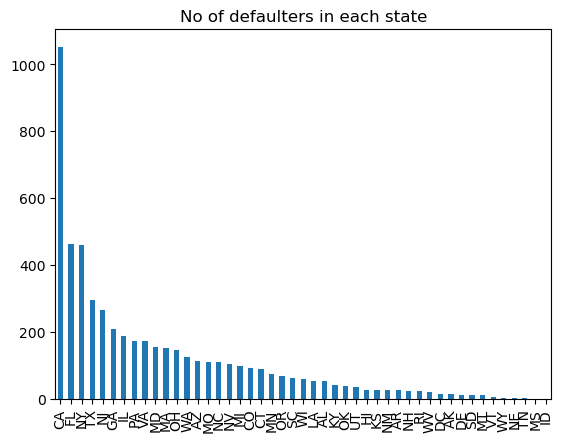

In [152]:
# Plotting a bar chart on addr_state, the chart shows that people in California have more no of defaulters.
data_defaulters.addr_state.value_counts().plot.bar()
plt.title("No of defaulters in each state")
plt.show()


In [153]:
data.monthly_in.describe()

count    37708.000000
mean      5386.911952
std       2803.149867
min        333.333333
25%       3333.333333
50%       4833.333333
75%       6666.666667
max      16666.666667
Name: monthly_in, dtype: float64

In [154]:
# Check if there is a correleation between purpose and addrss_state count. 
data_defaulters.purpose.value_counts().corr(data_defaulters.addr_state.value_counts())

nan

In [155]:
data_defaulters[data_defaulters.no_years_of_credit<0][['updated_issue_dt','upd_earliest_cr_line','loan_status','purpose','loan_amnt','funded_amnt']]

,updated_issue_dt,upd_earliest_cr_line,loan_status,purpose,loan_amnt,funded_amnt


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '11'),
  Text(1, 0, '12'),
  Text(2, 0, '10'),
  Text(3, 0, '13'),
  Text(4, 0, '14'),
  Text(5, 0, '15'),
  Text(6, 0, '9'),
  Text(7, 0, '16'),
  Text(8, 0, '5'),
  Text(9, 0, '8'),
  Text(10, 0, '7'),
  Text(11, 0, '6'),
  Text(12, 0, '17'),
  Text(13, 0, '4'),
  Text(14, 0, '18'),
  Text(15, 0, '19'),
  Text(16, 0, '20'),
  Text(17, 0, '21'),
  Text(18, 0, '22'),
  Text(19, 0, '23'),
  Text(20, 0, '3'),
  Text(21, 0, '25'),
  Text(22, 0, '26'),
  Text(23, 0, '24'),
  Text(24, 0, '28'),
  Text(25, 0, '27'),
  Text(26, 0, '29'),
  Text(27, 0, '32'),
  Text(28, 0, '30'),
  Text(29, 0, '31'),
  Text(30, 0, '33'),
  Text(31, 0, '0'),
  Text(32, 0, '34'),
  Text(33, 0, '38'),
  Text(34, 0, '36'),
  Text(35, 0, '39'),
  Text(36, 0, '35'),
  Text(37, 0, '37'),
  Text(38, 0, '41'),
  Text(39

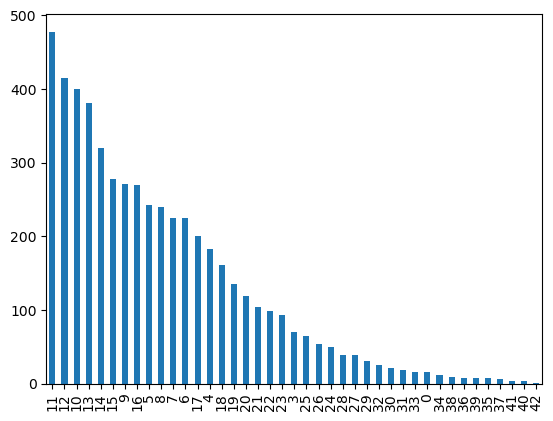

In [156]:
data_defaulters.no_years_of_credit.value_counts().plot.bar()
plt.xticks(rotation=90)

Text(0.5, 1.0, 'No of Defaulters in emp_length')

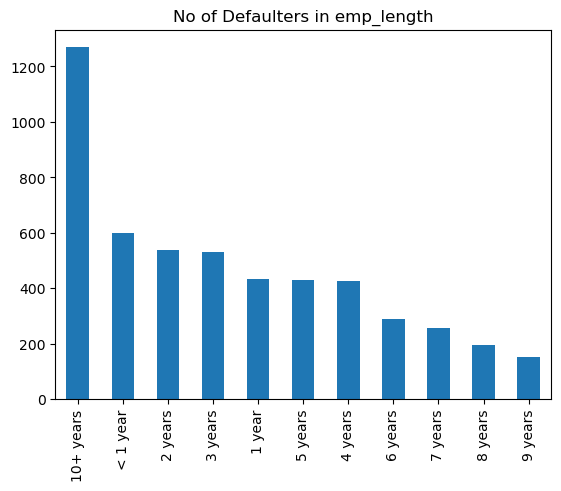

In [157]:
# Plotting a bar chart to get count of defaulters based on no of years of work experience show that people with more 
# 10 + years of experience default more. 
data_defaulters.emp_length.value_counts().plot.bar()
plt.xticks(rotation=90)
plt.title('No of Defaulters in emp_length')

In [158]:
data['issued_month']

0        12
2        12
3        12
5        12
6        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: issued_month, Length: 37708, dtype: int64

<Axes: >

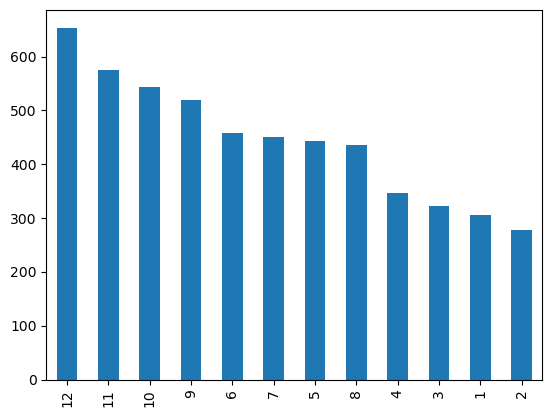

In [159]:
# plotting a bar chart on months that the loan was issued. 
# People who were issued loan in the last quarter of the year default more. 
data[data['loan_status']=='Charged Off']['issued_month'].value_counts().plot.bar()

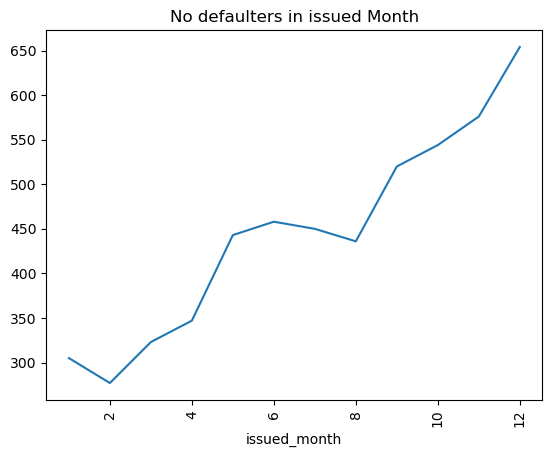

In [160]:
# Line chart also depicts the same. 
data_defaulters.groupby(by=['issued_month']).member_id.count().plot()
plt.xticks(rotation=90)
plt.title('No defaulters in issued Month')
plt.show()

<Axes: >

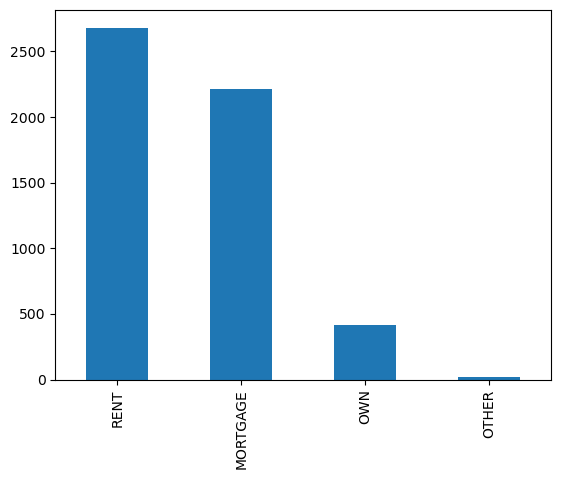

In [161]:
# Home_ownership vs defaulters
# People in Rented homes and home on mortgage default more.
data[data['loan_status']=='Charged Off']['home_ownership'].value_counts().plot.bar()

<Axes: >

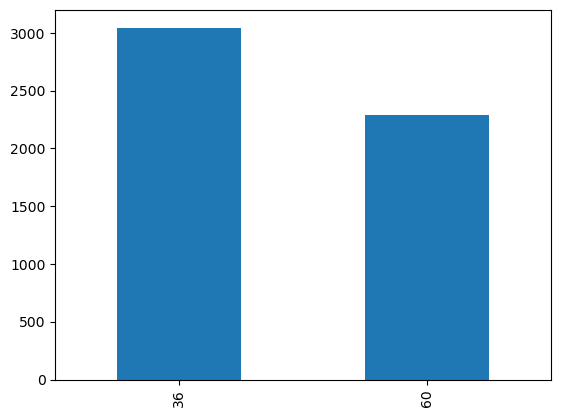

In [162]:
data_defaulters.term.value_counts().plot.bar()

Text(0.5, 1.0, 'No of Fully Paid customers in Interest Bucket')

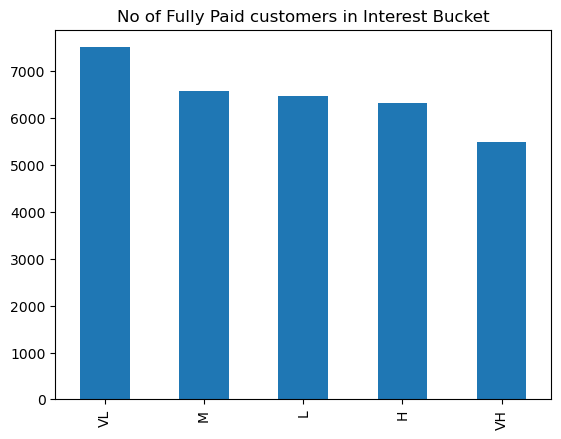

In [163]:
# Plotting a bar char on interest bucket of fully paid customers
# Indicates high no of people in VL intrest rate bucket pay off the loans
data_fullypaid.interest_bucket.value_counts().plot.bar()
plt.title("No of Fully Paid customers in Interest Bucket")

Text(0.5, 1.0, 'No of defaulters in Interest bucket')

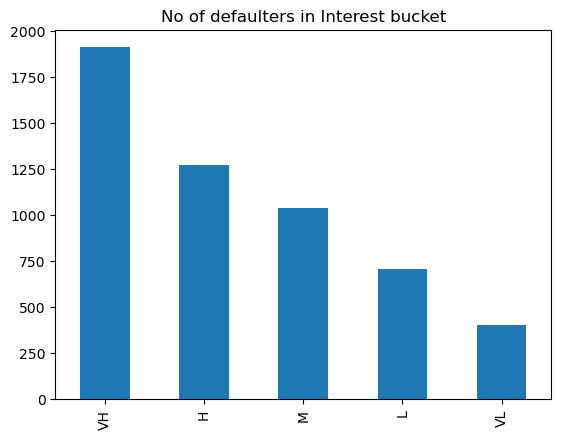

In [164]:
# Plotting a bar chart of interest rate bucket on the defaulters data
# People in VH interest rate bucket, default more compared to people in lower interest bucket. 
data_defaulters.interest_bucket.value_counts().plot.bar()
plt.title("No of defaulters in Interest bucket")

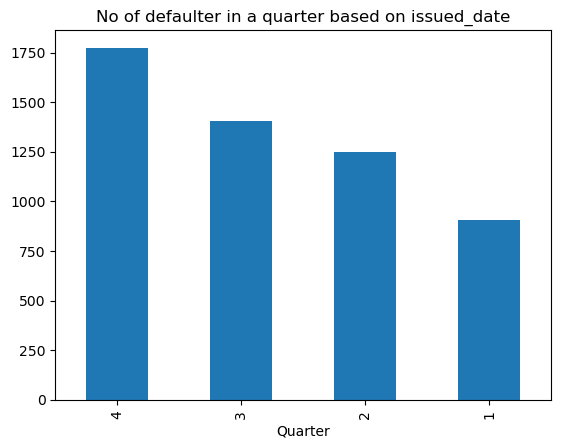

In [165]:
data_defaulters.issued_quarter.value_counts().plot.bar()
plt.title('No of defaulter in a quarter based on issued_date')
plt.xlabel('Quarter')
plt.show()

In [166]:
import seaborn as sns


# Bivariate Analysis

In [167]:
# Plotting pair plot to identify correlation between dti, revol_util, int_rate, annual_inc

sns.pairplot(data_defaulters[['dti', 'revol_util','int_rate','annual_inc']])

In [168]:
# Stacked chart defaulters per month per purpose

monthly_pivot=pd.pivot_table(data=data_defaulters, values='member_id', index='issued_quarter',columns='purpose',aggfunc='count')

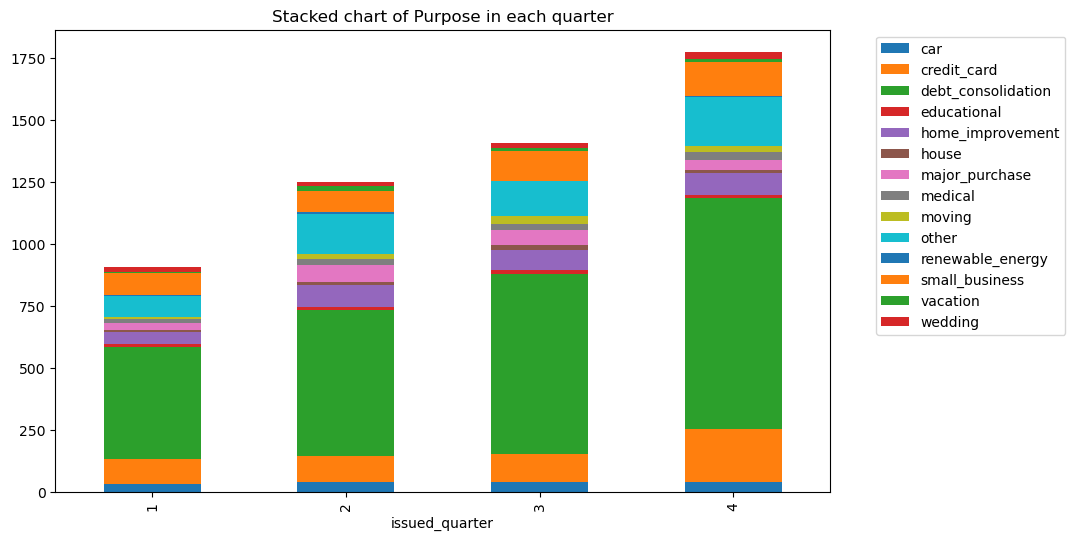

In [169]:
# Stacked bar plot on issued quarter vs purpose shows people who get loan for debt_consolidation in 4th quarter are likely to default more
monthly_pivot.plot(kind='bar', stacked='True', figsize=[10,6])
plt.title('Stacked chart of Purpose in each quarter')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [170]:
# Pivot on the annual salary bucket shows that people in VL and L bucket have high no of defaulters
result=pd.pivot_table(data=data_defaulters,index='loan_status',columns='income_bucket',values='member_id',aggfunc='count')

Text(0.5, 1.0, 'Defaulters in Income bucket')

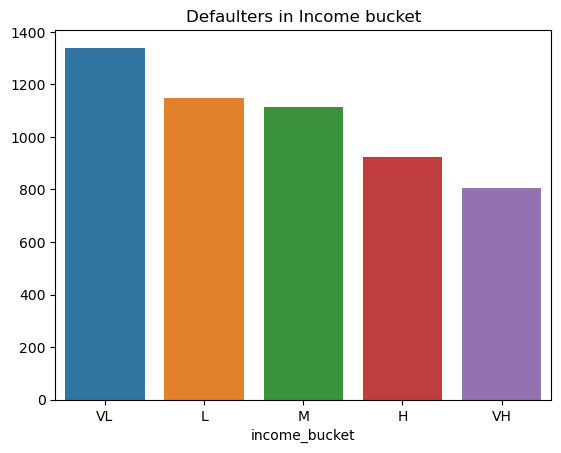

In [171]:
sns.barplot(result)
plt.title('Defaulters in Income bucket', fontsize=12)

Text(0.5, 1.0, 'Fully Paid Vs Income Bucket')

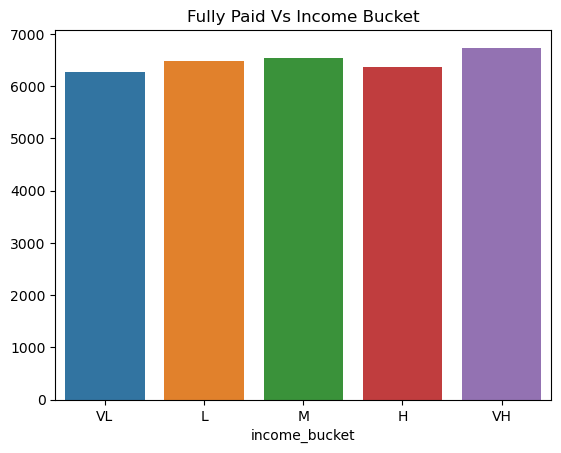

In [172]:
# Pivot on the annual salary bucket shows that people in VH and H bucket are more likely to pay off the loan
result2=pd.pivot_table(data=data_fullypaid,index='loan_status',columns='income_bucket',values='member_id',aggfunc='count')
sns.barplot(result2)
plt.title('Fully Paid Vs Income Bucket')

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
home_ownership,,,,,,,,,,,,,,
MORTGAGE,68.0,228.0,1114.0,12.0,242.0,17.0,68.0,41.0,8.0,174.0,9.0,190.0,13.0,32.0
OTHER,1.0,2.0,7.0,NaN,1.0,NaN,NaN,NaN,1.0,2.0,NaN,4.0,NaN,NaN
OWN,14.0,37.0,191.0,4.0,36.0,3.0,23.0,8.0,5.0,54.0,NaN,35.0,4.0,3.0
RENT,66.0,265.0,1385.0,32.0,35.0,33.0,104.0,48.0,69.0,355.0,7.0,200.0,33.0,50.0


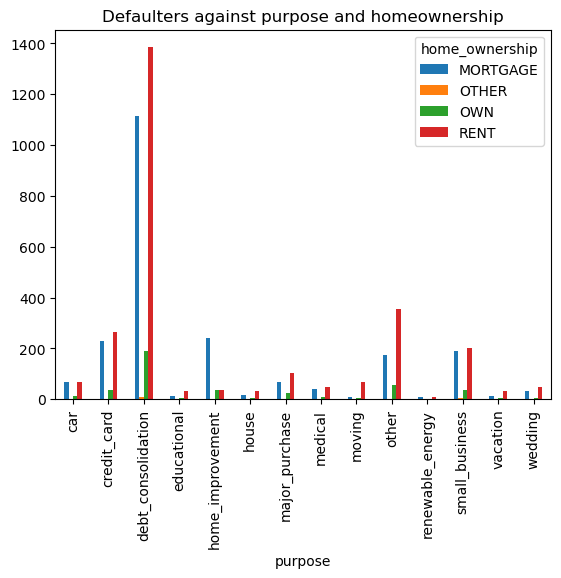

In [173]:
# Pivot on the annual salary bucket shows that people in VH and H bucket are more likely to pay off the loan
result2=pd.pivot_table(data=data_defaulters,index='home_ownership',columns='purpose',values='member_id',aggfunc='count')
result2.T.plot(kind='bar')
plt.title('Defaulters against purpose and homeownership')

result2

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
home_ownership,,,,,,,,,,,,,,
MORTGAGE,68.0,228.0,1114.0,12.0,242.0,17.0,68.0,41.0,8.0,174.0,9.0,190.0,13.0,32.0
OTHER,1.0,2.0,7.0,NaN,1.0,NaN,NaN,NaN,1.0,2.0,NaN,4.0,NaN,NaN
OWN,14.0,37.0,191.0,4.0,36.0,3.0,23.0,8.0,5.0,54.0,NaN,35.0,4.0,3.0
RENT,66.0,265.0,1385.0,32.0,35.0,33.0,104.0,48.0,69.0,355.0,7.0,200.0,33.0,50.0


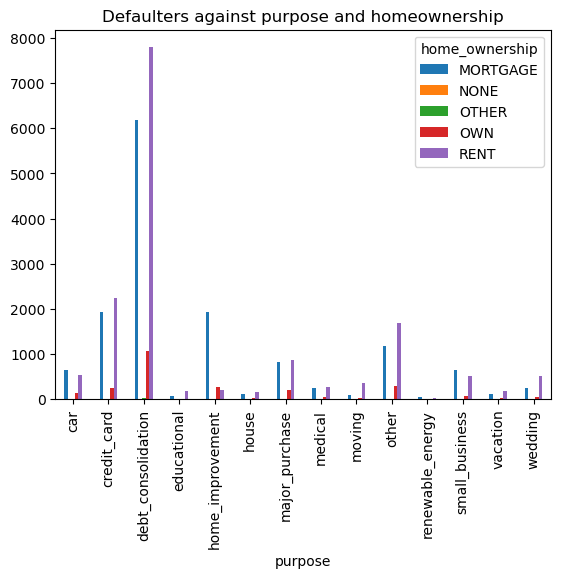

In [174]:
# Pivot on the annual salary bucket shows that people in VH and H bucket are more likely to pay off the loan
result3=pd.pivot_table(data=data_fullypaid,index='home_ownership',columns='purpose',values='member_id',aggfunc='count')
result3.T.plot(kind='bar')
plt.title('Defaulters against purpose and homeownership')

result2

Text(0.5, 1.0, 'Fully Paid Vs Income Bucket')

<Figure size 900x700 with 0 Axes>

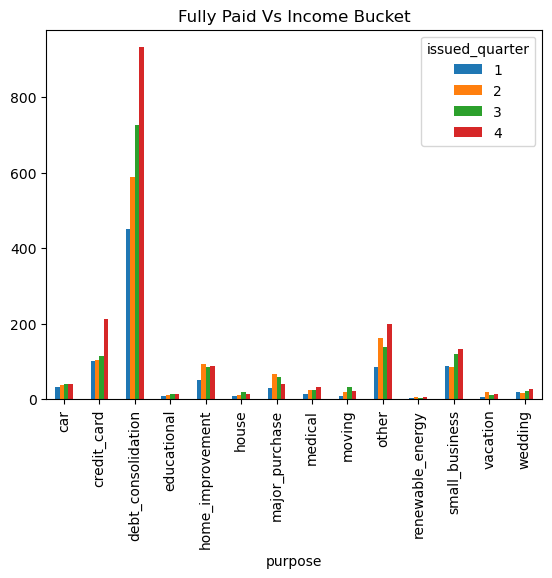

In [175]:
# Pivot on the annual salary bucket shows that people in VH and H bucket are more likely to pay off the loan
plt.figure(figsize=[9,7])
result4=pd.pivot_table(data=data_defaulters,index='issued_quarter',columns='purpose',values='member_id',aggfunc='count')
result4.T.plot(kind='bar')
plt.title('Fully Paid Vs Income Bucket')

Text(0.5, 1.0, 'Fully Paid Vs Income Bucket')

<Figure size 900x700 with 0 Axes>

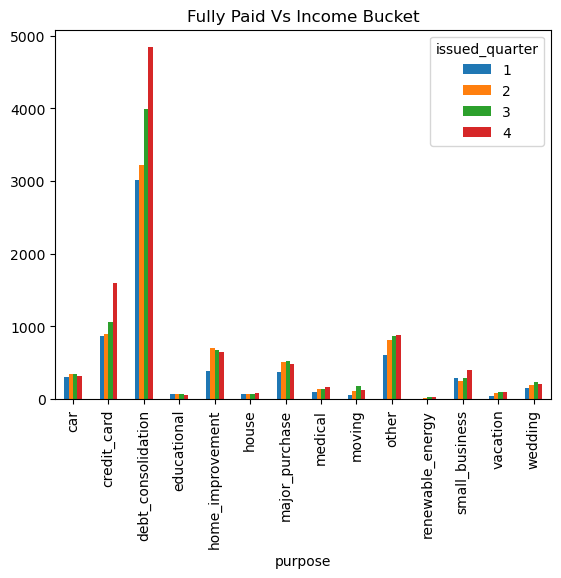

In [176]:
# Pivot on the annual salary bucket shows that people in VH and H bucket are more likely to pay off the loan
plt.figure(figsize=[9,7])
result4=pd.pivot_table(data=data_fullypaid,index='issued_quarter',columns='purpose',values='member_id',aggfunc='count')
result4.T.plot(kind='bar')
plt.title('Fully Paid Vs Income Bucket')

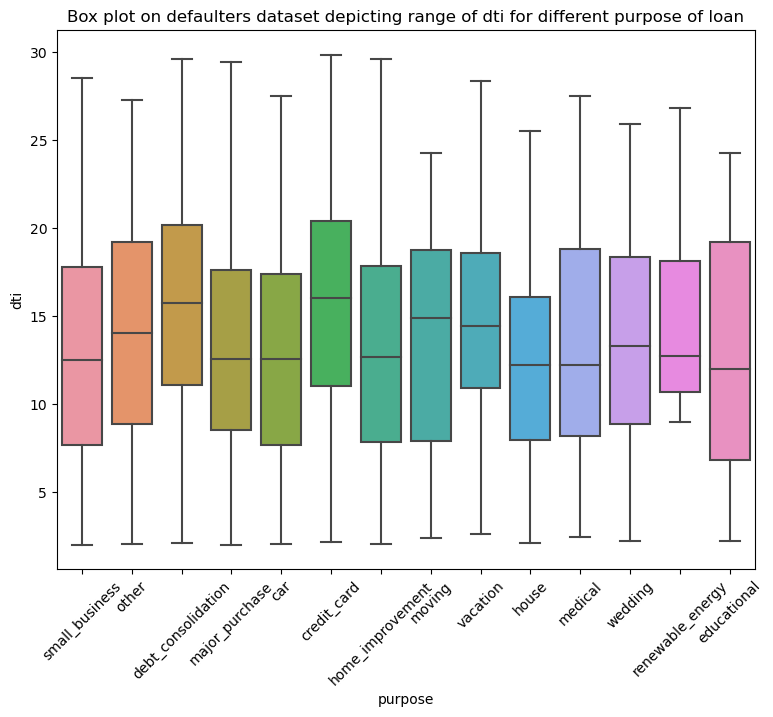

In [177]:
##Plot a box plot of dti vs purpose
## Indicates people who apply for loan for debt_consolidation and credit card have hight dti.
plt.figure(figsize=[9,7])
sns.boxplot(data_defaulters,x=data_defaulters.purpose, y=data_defaulters.dti)
plt.xticks(rotation=45)
plt.title('Box plot on defaulters dataset depicting range of dti for different purpose of loan', fontsize=12)
plt.show()

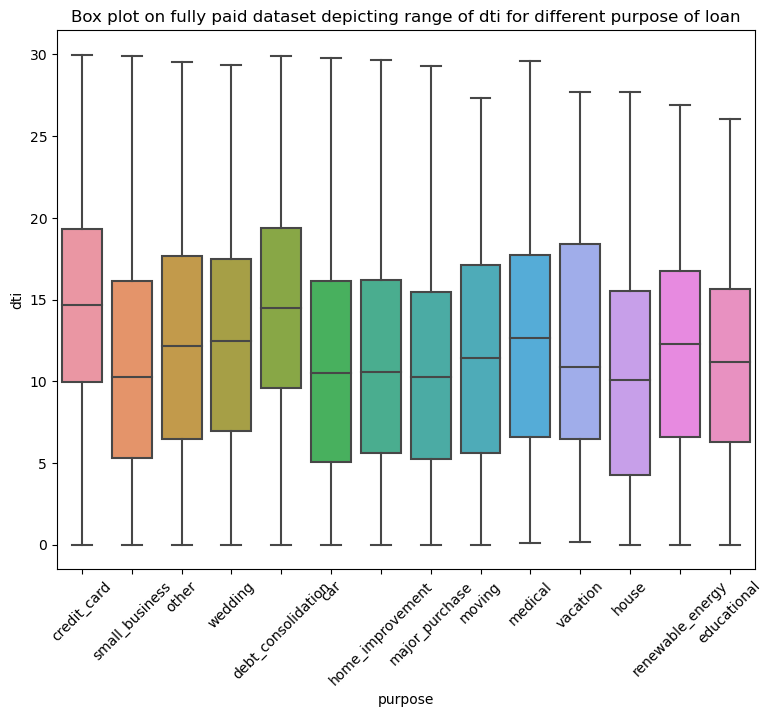

In [178]:
##Plot a box plot of Rating vs Content Rating
plt.figure(figsize=[9,7])
sns.boxplot(data_fullypaid,x=data_fullypaid.purpose, y=data_fullypaid.dti)
plt.xticks(rotation=45)
plt.title('Box plot on fully paid dataset depicting range of dti for different purpose of loan', fontsize=12)
plt.show()

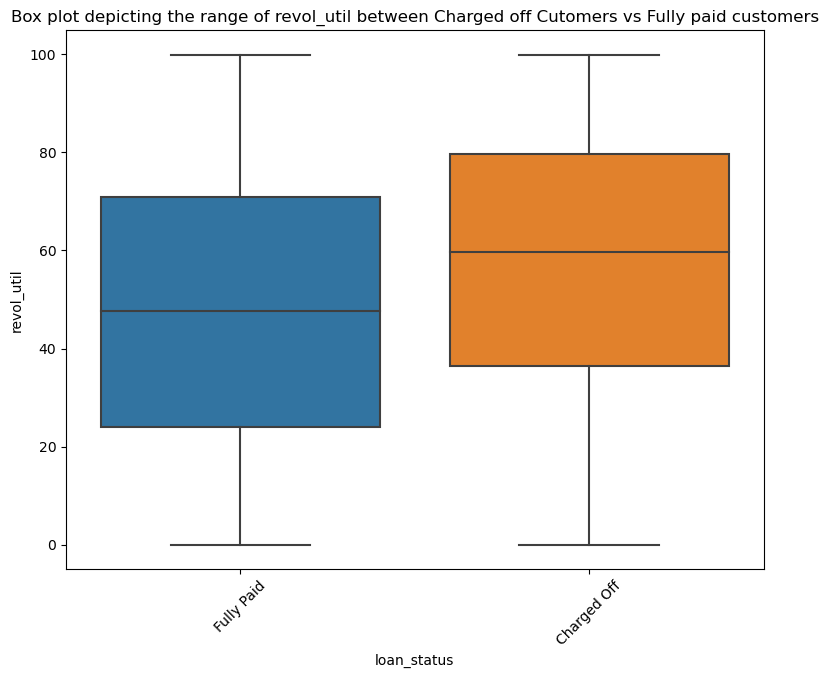

In [179]:
##Plot a box plot of Loan status and revol_util
## Indicates that charged off customers have a higher median, 25th percentile and 75h percentile compared to fully paid customers
plt.figure(figsize=[9,7])
sns.boxplot(data,x=data.loan_status, y=data.revol_util)
plt.xticks(rotation=45)
plt.title('Box plot depicting the range of revol_util between Charged off Cutomers vs Fully paid customers', fontsize=12)
plt.show()

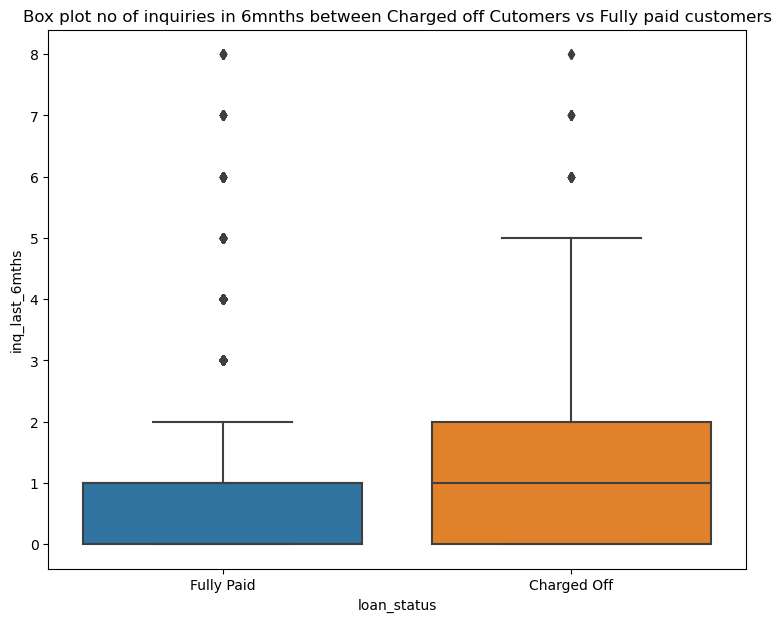

In [180]:
##Plot a box plot of no of inquiries in 6th months and loan_staus
## Indicates that charged off customers have a higher median, and 75h percentile compared to fully paid customers
plt.figure(figsize=[9,7])
sns.boxplot(data,x=data.loan_status, y=data.inq_last_6mths)
plt.title('Box plot no of inquiries in 6mnths between Charged off Cutomers vs Fully paid customers', fontsize=12)
plt.show()